# Attrition Risk Model
Predict employees at risk of attrition using tenure, performance, and engagement.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Load dataset
attr = pd.read_csv('../data/attrition.csv')

# Feature and target selection
X = attr[['Tenure_Months', 'Engagement_Score', 'Performance_Score']]
y = attr['Attrition_Flag']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.82      0.82      0.82        11

    accuracy                           0.92        48
   macro avg       0.88      0.88      0.88        48
weighted avg       0.92      0.92      0.92        48

ROC AUC: 0.9631449631449632


## Coefficients

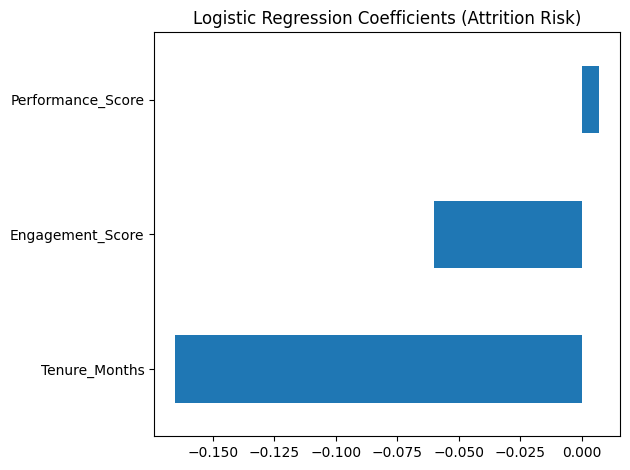

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
coef = pd.Series(model.coef_[0], index=X.columns).sort_values()
ax = coef.plot(kind='barh')
ax.set_title('Logistic Regression Coefficients (Attrition Risk)')
plt.tight_layout()
plt.show()